<a href="https://colab.research.google.com/github/BM-MINNIE/DES432_Project1_Netflix/blob/main/analysis_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install and Import Requires libraries**

In [ ]:
!pip install -q pandas numpy matplotlib seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from google.colab import files
import io
import zipfile
warnings.filterwarnings('ignore')

In [ ]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("NETFLIX TITLES DATASET ANALYSIS - GOOGLE COLAB")
print("="*80)
print("\n✓ All packages loaded successfully!")

NETFLIX TITLES DATASET ANALYSIS - GOOGLE COLAB

✓ All packages loaded successfully!


**2. Upload Dataset**

In [ ]:
print("\n" + "="*80)
print("UPLOAD YOUR DATASET")
print("="*80)
print("\nPlease upload 'netflix_titles.csv' file...")
print("Click the 'Choose Files' button that appears below.")

# Upload file
uploaded = files.upload()

# Get the filename
csv_filename = list(uploaded.keys())[0]
print(f"\n✓ File '{csv_filename}' uploaded successfully!")

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[csv_filename]))
print(f"✓ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")



UPLOAD YOUR DATASET

Please upload 'netflix_titles.csv' file...
Click the 'Choose Files' button that appears below.


Saving netflix_titles.csv to netflix_titles.csv

✓ File 'netflix_titles.csv' uploaded successfully!
✓ Dataset loaded: 8807 rows × 12 columns


**3.Dataset Description**

In [ ]:
print("\n" + "="*80)
print("1. DATASET DESCRIPTION")
print("="*80)

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nData Source: Netflix Movies and TV Shows Dataset")
print(f"Context: Information about movies and TV shows available on Netflix.")
print(f"Unit of Analysis: Each row represents a single title (movie or TV show).")

print("\n\nColumn Information:")
print(df.dtypes)

print("\n\nFirst few rows:")
display(df.head())

print("\n\nDataset Info:")
df.info()


1. DATASET DESCRIPTION

Dataset Shape: 8807 rows × 12 columns

Data Source: Netflix Movies and TV Shows Dataset
Context: Information about movies and TV shows available on Netflix.
Unit of Analysis: Each row represents a single title (movie or TV show).


Column Information:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


First few rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**4. Data Quality Assessment**

In [ ]:
print("\n" + "="*80)
print("2. DATA CLEANING AND PREPROCESSING")
print("="*80)

print("\n2.1 Identifying Data Quality Issues")
print("-" * 80)

# Missing values
print("\nMissing Values Analysis:")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Data type issues
print("\n\nData Type Issues Identified:")
print("- 'date_added' is object type, should be datetime")
print("- 'duration' is object type, contains mixed formats (minutes/seasons)")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Release year range
print(f"\nRelease Year Range: {df['release_year'].min()} to {df['release_year'].max()}")
print(f"Note: Some very old release years may be outliers")

# Unique values
print(f"\nUnique Content Types: {df['type'].unique()}")
print(f"Number of Unique Ratings: {df['rating'].nunique()}")
print(f"\nTop 5 Ratings:")
print(df['rating'].value_counts().head())


2. DATA CLEANING AND PREPROCESSING

2.1 Identifying Data Quality Issues
--------------------------------------------------------------------------------

Missing Values Analysis:


,Missing Count,Percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064




Data Type Issues Identified:
- 'date_added' is object type, should be datetime
- 'duration' is object type, contains mixed formats (minutes/seasons)

Duplicate Rows: 0

Release Year Range: 1925 to 2021
Note: Some very old release years may be outliers

Unique Content Types: ['Movie' 'TV Show']
Number of Unique Ratings: 17

Top 5 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


**5.Data Cleaning Implementation**

In [ ]:
print("\n2.2 Data Cleaning Decisions and Justification")
print("-" * 80)

# Create clean copy
df_clean = df.copy()

print("\nCleaning Decisions:")
print("\n1. Missing Directors (29.9%):")
print("   - Decision: RETAIN missing values")
print("   - Justification: Missing pattern is informative for TV shows/documentaries")

print("\n2. Missing Cast (9.4%):")
print("   - Decision: RETAIN missing values")
print("   - Justification: Some content legitimately lacks cast info")

print("\n3. Missing Country (9.4%):")
print("   - Decision: RETAIN for analysis")
print("   - Justification: Data quality issue worth analyzing")

print("\n4. Data Type Conversions:")
print("   - Convert date_added to datetime")
print("   - Extract numeric duration values")

# Apply transformations
print("\n\nApplying Transformations...")

# Convert dates
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

# Create indicator variables
df_clean['has_director'] = ~df_clean['director'].isna()
df_clean['has_cast'] = ~df_clean['cast'].isna()
df_clean['has_country'] = ~df_clean['country'].isna()

# Extract duration
def extract_duration(duration_str, content_type):
    if pd.isna(duration_str):
        return np.nan
    try:
        return int(duration_str.split()[0])
    except:
        return np.nan

df_clean['duration_value'] = df_clean.apply(
    lambda row: extract_duration(row['duration'], row['type']), axis=1
)

# Split by type
df_movies = df_clean[df_clean['type'] == 'Movie'].copy()
df_tvshows = df_clean[df_clean['type'] == 'TV Show'].copy()

print(f"\n✓ Cleaning Complete!")
print(f"Original dataset: {len(df)} rows")
print(f"Movies: {len(df_movies)} rows ({len(df_movies)/len(df_clean)*100:.1f}%)")
print(f"TV Shows: {len(df_tvshows)} rows ({len(df_tvshows)/len(df_clean)*100:.1f}%)")

# Outlier detection
Q1_year = df_clean['release_year'].quantile(0.25)
Q3_year = df_clean['release_year'].quantile(0.75)
IQR_year = Q3_year - Q1_year
outliers_year = df_clean[
    (df_clean['release_year'] < Q1_year - 1.5 * IQR_year) |
    (df_clean['release_year'] > Q3_year + 1.5 * IQR_year)
]

print(f"\nOutlier Analysis:")
print(f"Release year outliers: {len(outliers_year)} titles")
print(f"Oldest title: {df_clean['release_year'].min()} - '{df_clean[df_clean['release_year'] == df_clean['release_year'].min()]['title'].iloc[0]}'")

if len(df_movies) > 0:
    Q1_duration = df_movies['duration_value'].quantile(0.25)
    Q3_duration = df_movies['duration_value'].quantile(0.75)
    IQR_duration = Q3_duration - Q1_duration
    outliers_duration = df_movies[
        (df_movies['duration_value'] < Q1_duration - 1.5 * IQR_duration) |
        (df_movies['duration_value'] > Q3_duration + 1.5 * IQR_duration)
    ]
    print(f"Movie duration outliers: {len(outliers_duration)} movies")
    print(f"Duration range: {df_movies['duration_value'].min():.0f} - {df_movies['duration_value'].max():.0f} minutes")



2.2 Data Cleaning Decisions and Justification
--------------------------------------------------------------------------------

Cleaning Decisions:

1. Missing Directors (29.9%):
   - Decision: RETAIN missing values
   - Justification: Missing pattern is informative for TV shows/documentaries

2. Missing Cast (9.4%):
   - Decision: RETAIN missing values
   - Justification: Some content legitimately lacks cast info

3. Missing Country (9.4%):
   - Decision: RETAIN for analysis
   - Justification: Data quality issue worth analyzing

4. Data Type Conversions:
   - Convert date_added to datetime
   - Extract numeric duration values


Applying Transformations...

✓ Cleaning Complete!
Original dataset: 8807 rows
Movies: 6131 rows (69.6%)
TV Shows: 2676 rows (30.4%)

Outlier Analysis:
Release year outliers: 719 titles
Oldest title: 1925 - 'Pioneers: First Women Filmmakers*'
Movie duration outliers: 450 movies
Duration range: 3 - 312 minutes


**6.EDA - Distribution Analysis **


3. EXPLORATORY DATA ANALYSIS

3.1 Distribution Analysis
--------------------------------------------------------------------------------


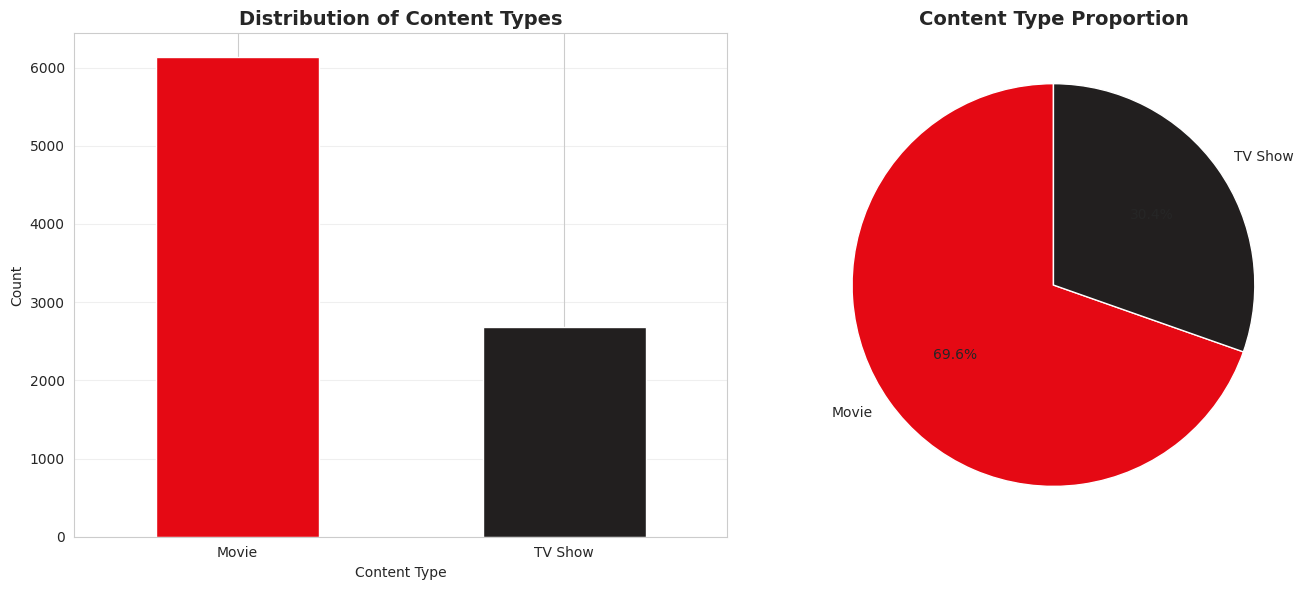


📊 Visualization 1: Content Type Distribution
Interpretation: Netflix has 6131 movies (69.6%) and 2676 TV shows (30.4%). Movies dominate the Netflix library, representing approximately two-thirds of all content.


In [ ]:
print("\n" + "="*80)
print("3. EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n3.1 Distribution Analysis")
print("-" * 80)

# Plot 1: Content Type Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

type_counts = df_clean['type'].value_counts()
type_counts.plot(kind='bar', color=['#E50914', '#221f1f'], ax=ax1)
ax1.set_title('Distribution of Content Types', fontsize=14, fontweight='bold')
ax1.set_xlabel('Content Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

ax2.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        colors=['#E50914', '#221f1f'], startangle=90)
ax2.set_title('Content Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 1: Content Type Distribution")
print(f"Interpretation: Netflix has {type_counts['Movie']} movies ({type_counts['Movie']/len(df_clean)*100:.1f}%) "
      f"and {type_counts['TV Show']} TV shows ({type_counts['TV Show']/len(df_clean)*100:.1f}%). "
      f"Movies dominate the Netflix library, representing approximately two-thirds of all content.")

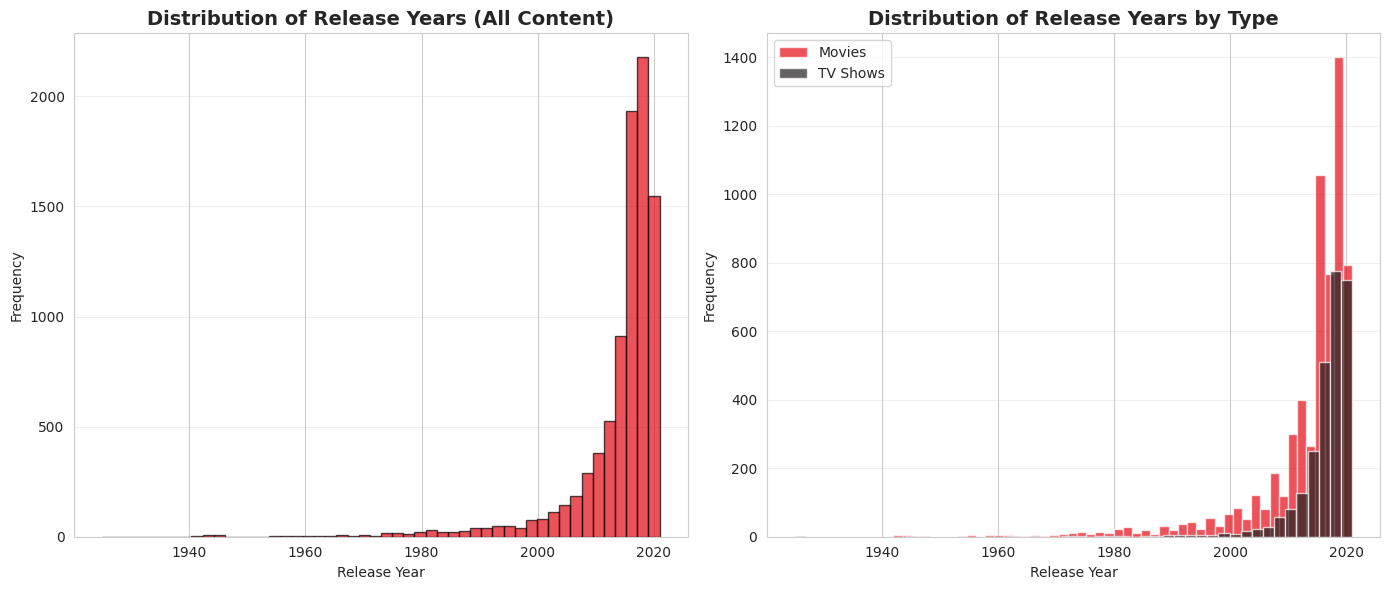


📊 Visualization 2: Release Year Distribution
Interpretation: Right-skewed distribution with most content after 2000. Median release year: 2017. Netflix's library heavily favors recent content, with sharp increase from 2010s onward.


In [ ]:
# Plot 2: Release Year Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df_clean['release_year'].dropna(), bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Release Years (All Content)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.3)

df_movies['release_year'].plot(kind='hist', bins=50, alpha=0.7, label='Movies', color='#E50914', ax=ax2)
df_tvshows['release_year'].plot(kind='hist', bins=50, alpha=0.7, label='TV Shows', color='#221f1f', ax=ax2)
ax2.set_title('Distribution of Release Years by Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 2: Release Year Distribution")
print(f"Interpretation: Right-skewed distribution with most content after 2000. "
      f"Median release year: {df_clean['release_year'].median():.0f}. "
      f"Netflix's library heavily favors recent content, with sharp increase from 2010s onward.")


**7. EDA - Movue Duration Analysis**

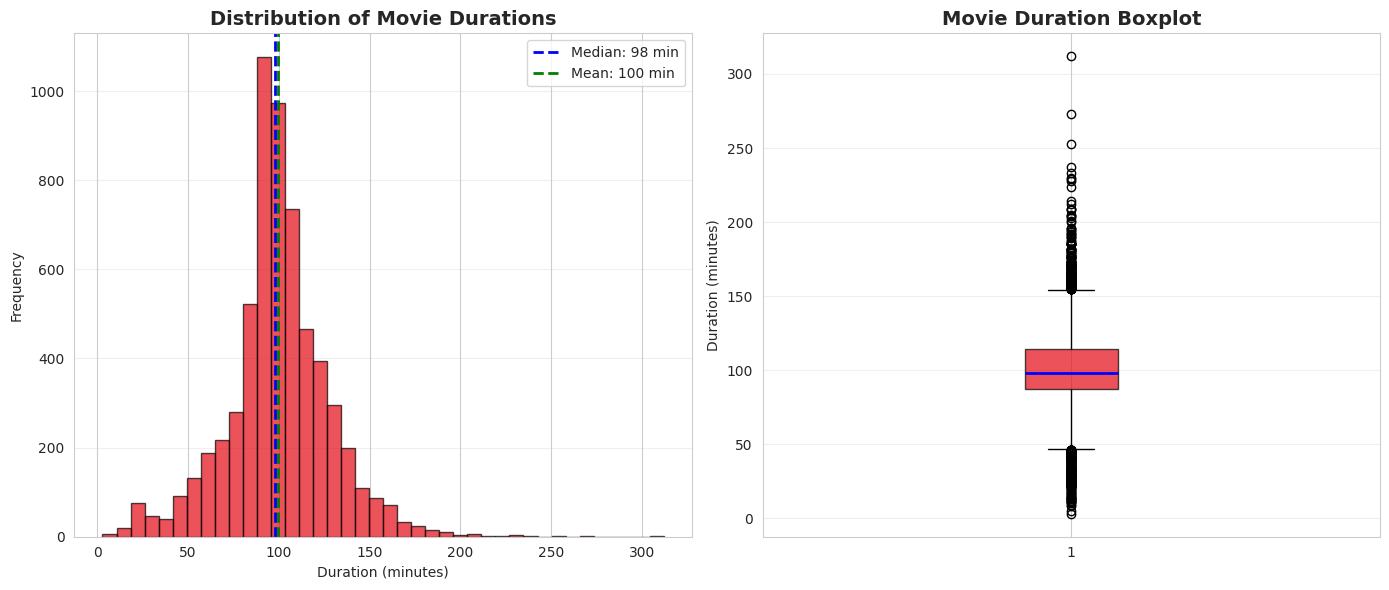


📊 Visualization 3: Movie Duration Distribution
Interpretation: Nearly normal distribution centered at 98 minutes (median). Mean: 100 minutes. Most movies 80-120 minutes (typical feature film length). Longest film: 312 minutes.


In [ ]:
# Plot 3: Movie Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df_movies['duration_value'].dropna(), bins=40, color='#E50914', edgecolor='black', alpha=0.7)
ax1.axvline(df_movies['duration_value'].median(), color='blue', linestyle='--', linewidth=2,
            label=f'Median: {df_movies["duration_value"].median():.0f} min')
ax1.axvline(df_movies['duration_value'].mean(), color='green', linestyle='--', linewidth=2,
            label=f'Mean: {df_movies["duration_value"].mean():.0f} min')
ax1.set_title('Distribution of Movie Durations', fontsize=14, fontweight='bold')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

bp = ax2.boxplot(df_movies['duration_value'].dropna(), vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#E50914', alpha=0.7),
                 medianprops=dict(color='blue', linewidth=2))
ax2.set_title('Movie Duration Boxplot', fontsize=14, fontweight='bold')
ax2.set_ylabel('Duration (minutes)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 3: Movie Duration Distribution")
print(f"Interpretation: Nearly normal distribution centered at {df_movies['duration_value'].median():.0f} minutes (median). "
      f"Mean: {df_movies['duration_value'].mean():.0f} minutes. Most movies 80-120 minutes (typical feature film length). "
      f"Longest film: {df_movies['duration_value'].max():.0f} minutes.")

**8.EDA - TV Show Analysis**

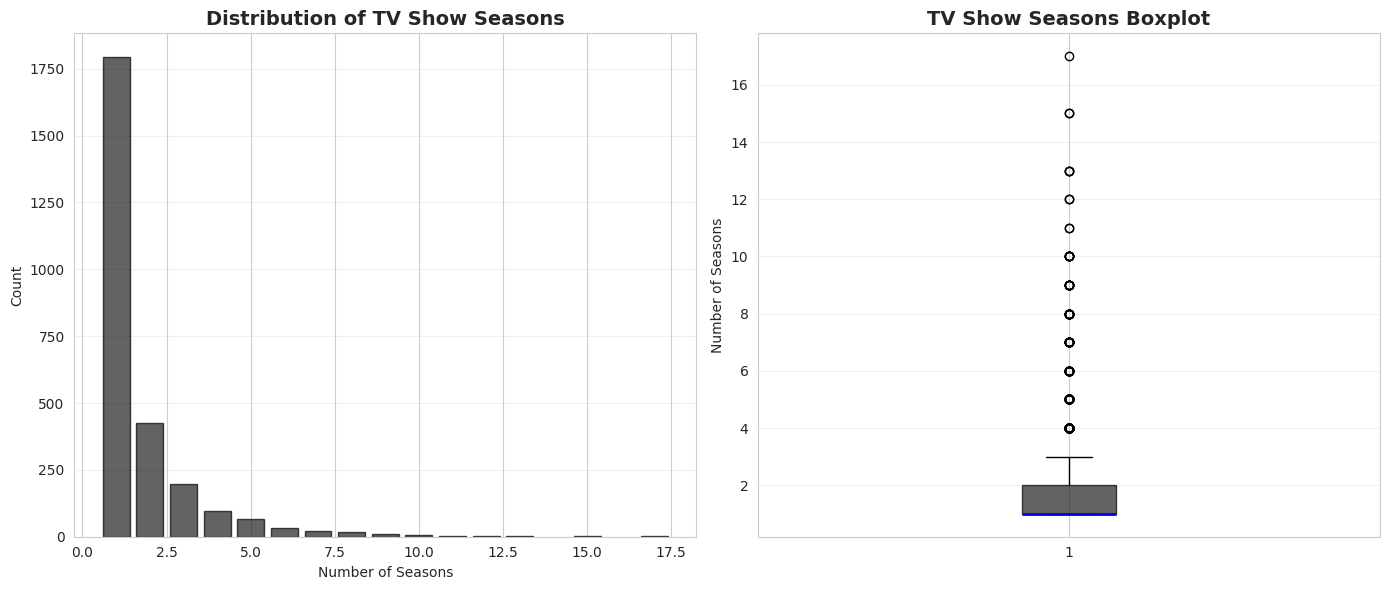


📊 Visualization 4: TV Show Seasons Distribution
Interpretation: Heavily right-skewed. Most TV shows have 1 season(s), median: 1. Reflects Netflix's limited series strategy. Maximum: 17 seasons (long-running series).


In [ ]:
# Plot 4: TV Show Seasons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

seasons_counts = df_tvshows['duration_value'].value_counts().sort_index()
ax1.bar(seasons_counts.index, seasons_counts.values, color='#221f1f', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of TV Show Seasons', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Seasons')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

bp = ax2.boxplot(df_tvshows['duration_value'].dropna(), vert=True, patch_artist=True,
                 boxprops=dict(facecolor='#221f1f', alpha=0.7),
                 medianprops=dict(color='blue', linewidth=2))
ax2.set_title('TV Show Seasons Boxplot', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Seasons')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 4: TV Show Seasons Distribution")
print(f"Interpretation: Heavily right-skewed. Most TV shows have {df_tvshows['duration_value'].mode()[0]:.0f} season(s), "
      f"median: {df_tvshows['duration_value'].median():.0f}. Reflects Netflix's limited series strategy. "
      f"Maximum: {df_tvshows['duration_value'].max():.0f} seasons (long-running series).")

**9. EDA - Temporal Analysis**

<Figure size 1400x600 with 0 Axes>

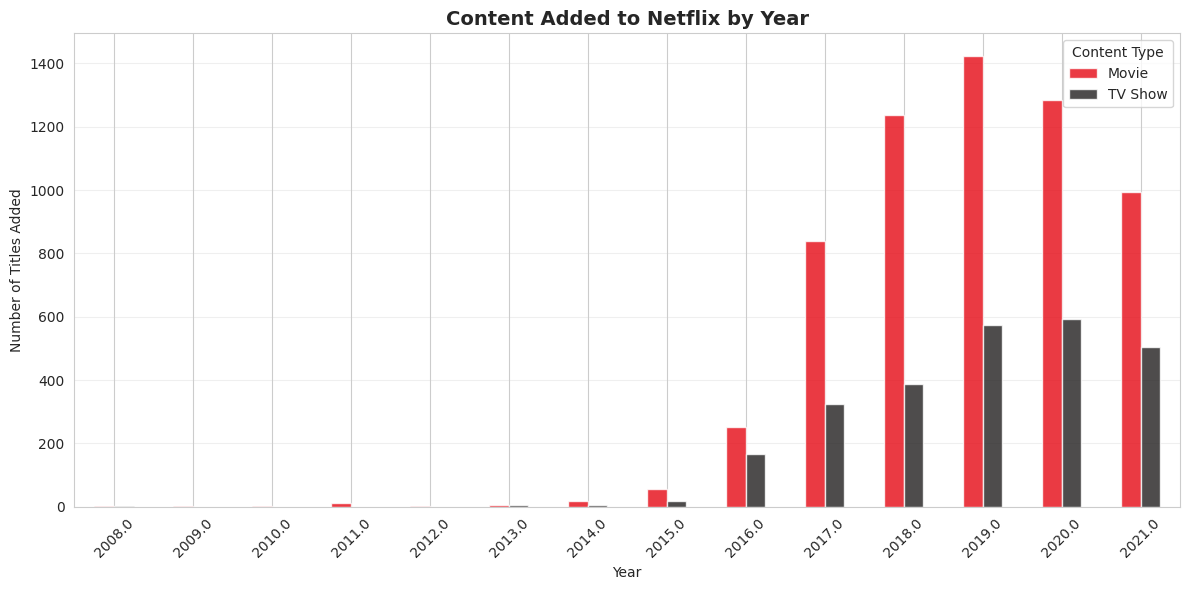


📊 Visualization 5: Content Added Over Time
Interpretation: Clear upward trend with peaks around 2019-2020. Reflects Netflix's aggressive content expansion strategy. Movies consistently outnumber TV shows in additions.


In [ ]:
df_timeline = df_clean.dropna(subset=['year_added'])
yearly_additions = df_timeline.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
yearly_additions.plot(kind='bar', stacked=False, color=['#E50914', '#221f1f'], alpha=0.8)
plt.title('Content Added to Netflix by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 5: Content Added Over Time")
print(f"Interpretation: Clear upward trend with peaks around 2019-2020. Reflects Netflix's aggressive "
      f"content expansion strategy. Movies consistently outnumber TV shows in additions.")

**10. EDA - Rating Analysis**

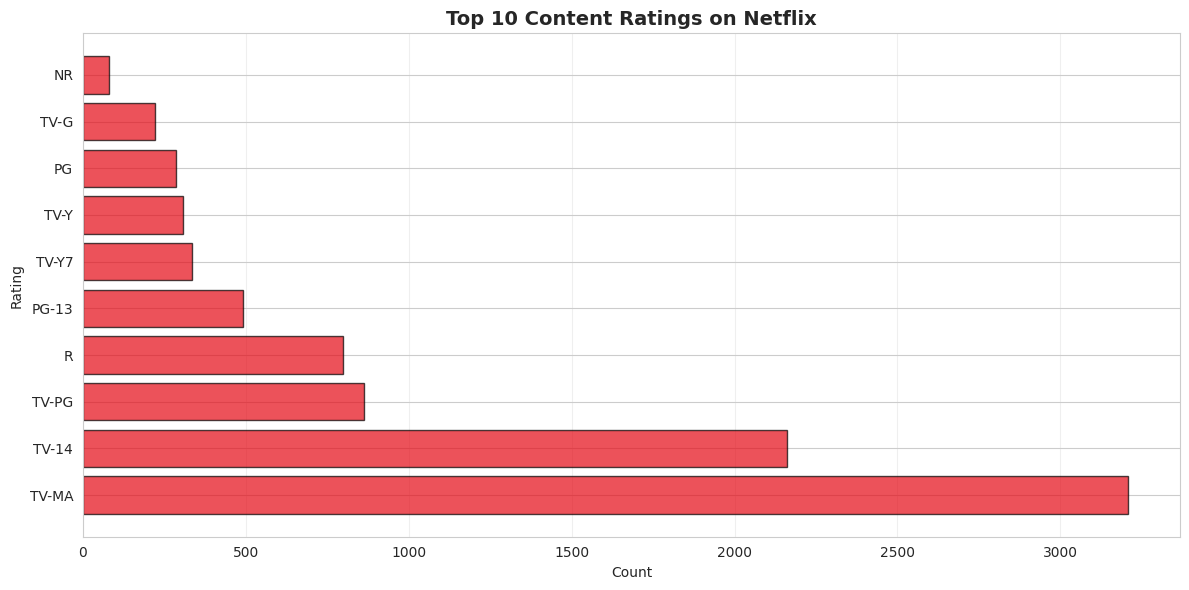


📊 Visualization 6: Content Ratings Distribution
Interpretation: TV-MA and TV-14 most common, indicating adult audience focus. TV-MA content: 3207 titles. Shows diversity in demographics but clear emphasis on mature programming.


In [ ]:
# Plot 6: Content Ratings
plt.figure(figsize=(12, 6))
rating_counts = df_clean['rating'].fillna('Unrated').value_counts().head(10)
plt.barh(rating_counts.index, rating_counts.values, color='#E50914', edgecolor='black', alpha=0.7)
plt.title('Top 10 Content Ratings on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 6: Content Ratings Distribution")
print(f"Interpretation: TV-MA and TV-14 most common, indicating adult audience focus. "
      f"TV-MA content: {rating_counts.get('TV-MA', 0)} titles. Shows diversity in demographics "
      f"but clear emphasis on mature programming.")


**12. EDA - Group Comparison**


3.2 Group Comparisons
--------------------------------------------------------------------------------


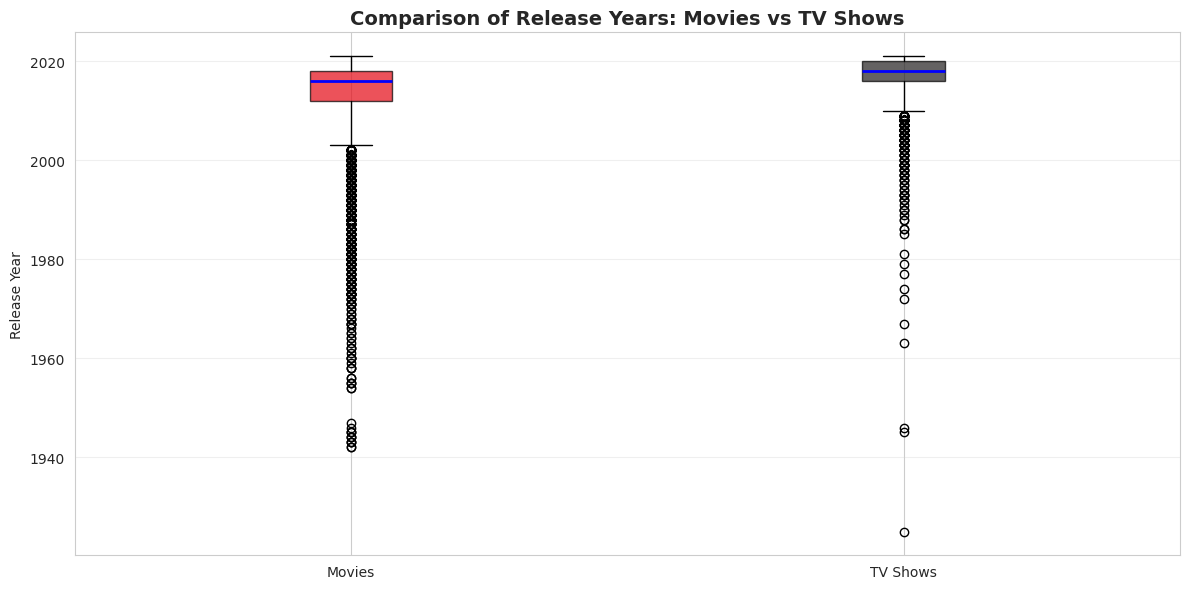


📊 Visualization 7: Release Year Comparison
Interpretation: TV shows more recent (median: 2018) than movies (median: 2016). Netflix features current TV series while maintaining broader historical movie catalog.


In [ ]:
print("\n3.2 Group Comparisons")
print("-" * 80)

# Plot 7: Release Year Comparison
plt.figure(figsize=(12, 6))
data_to_plot = [df_movies['release_year'].dropna(), df_tvshows['release_year'].dropna()]
bp = plt.boxplot(data_to_plot, labels=['Movies', 'TV Shows'], patch_artist=True,
                 medianprops=dict(color='blue', linewidth=2))
bp['boxes'][0].set_facecolor('#E50914')
bp['boxes'][1].set_facecolor('#221f1f')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_alpha(0.7)
plt.title('Comparison of Release Years: Movies vs TV Shows', fontsize=14, fontweight='bold')
plt.ylabel('Release Year')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

movie_median_year = df_movies['release_year'].median()
tv_median_year = df_tvshows['release_year'].median()

print(f"\n📊 Visualization 7: Release Year Comparison")
print(f"Interpretation: TV shows more recent (median: {tv_median_year:.0f}) than movies (median: {movie_median_year:.0f}). "
      f"Netflix features current TV series while maintaining broader historical movie catalog.")

**EDA - Rating by Type**

<Figure size 1400x600 with 0 Axes>

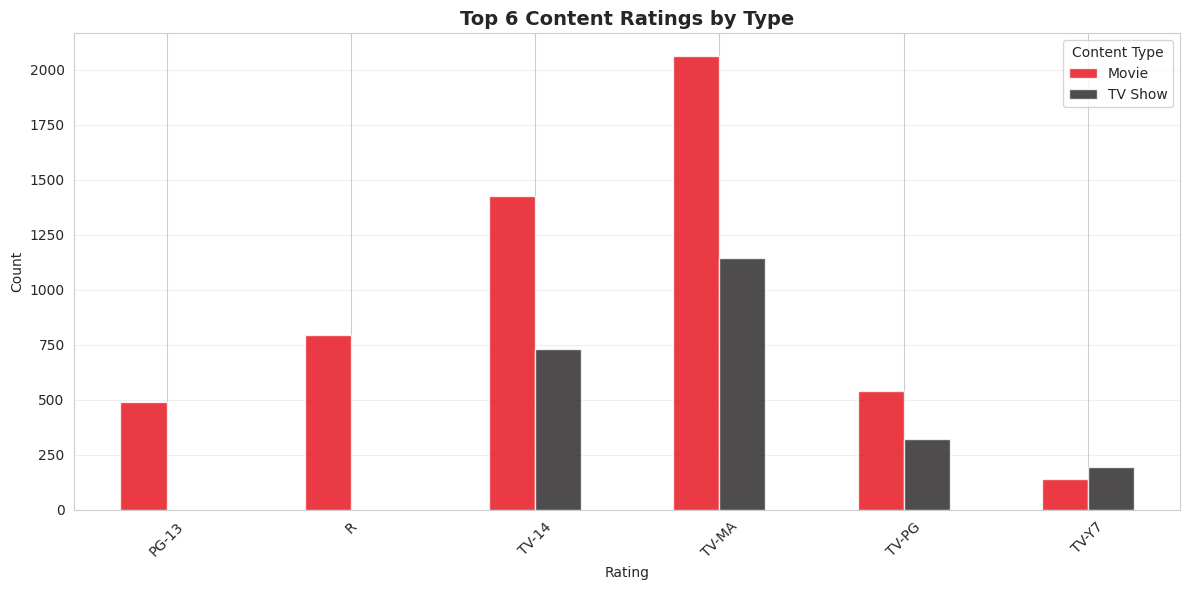


 Visualization 8: Ratings by Content Type
Interpretation: TV-MA dominant for both types but more prevalent in TV shows. Movies show more rating diversity. Different content strategies by type.


In [ ]:
# Plot 8: Ratings by Content Type
plt.figure(figsize=(14, 6))
top_ratings = df_clean['rating'].value_counts().head(6).index
df_ratings = df_clean[df_clean['rating'].isin(top_ratings)]
rating_type_counts = pd.crosstab(df_ratings['rating'], df_ratings['type'])
rating_type_counts.plot(kind='bar', color=['#E50914', '#221f1f'], alpha=0.8)
plt.title('Top 6 Content Ratings by Type', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n Visualization 8: Ratings by Content Type")
print(f"Interpretation: TV-MA dominant for both types but more prevalent in TV shows. "
      f"Movies show more rating diversity. Different content strategies by type.")


**EDA - Relationship Analysis **


3.3 Relationship Exploration
--------------------------------------------------------------------------------


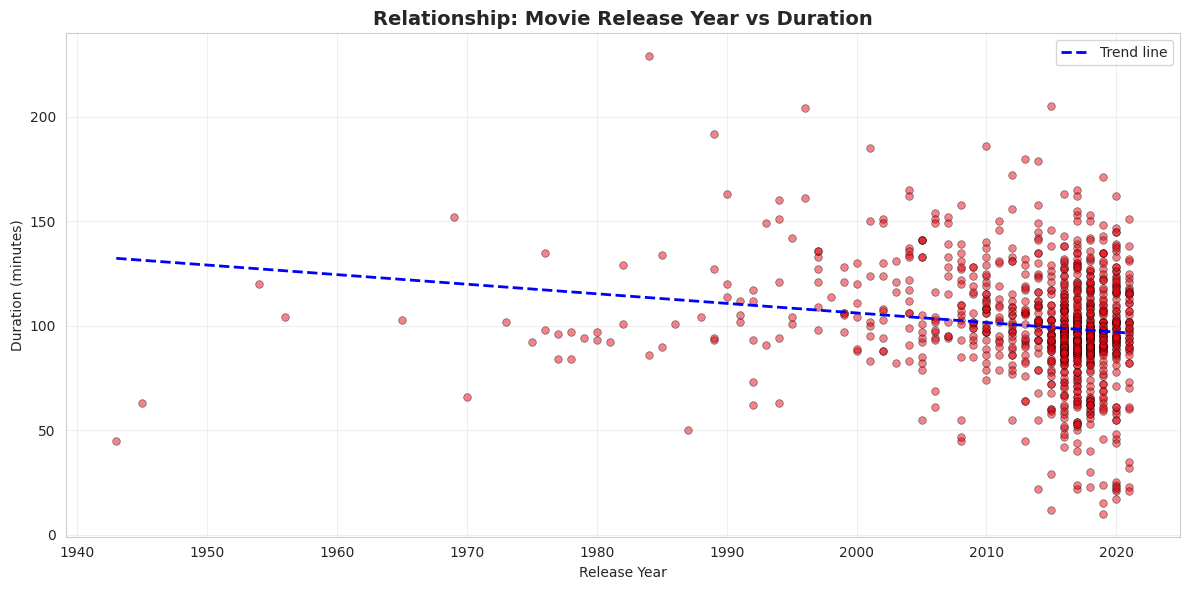


📊 Visualization 9: Release Year vs Duration
Interpretation: Correlation coefficient: -0.159. Weak negative correlation. Movie durations remain stable around 90-120 min across eras.


In [ ]:
print("\n3.3 Relationship Exploration")
print("-" * 80)

# Plot 9: Year vs Duration Scatterplot
plt.figure(figsize=(12, 6))
sample_movies = df_movies.dropna(subset=['release_year', 'duration_value']).sample(
    min(1000, len(df_movies)), random_state=42
)
plt.scatter(sample_movies['release_year'], sample_movies['duration_value'],
            alpha=0.5, c='#E50914', s=30, edgecolor='black', linewidth=0.5)

# Trend line
z = np.polyfit(sample_movies['release_year'], sample_movies['duration_value'], 1)
p = np.poly1d(z)
plt.plot(sample_movies['release_year'].sort_values(),
         p(sample_movies['release_year'].sort_values()),
         "b--", linewidth=2, label='Trend line')

plt.title('Relationship: Movie Release Year vs Duration', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

correlation = sample_movies['release_year'].corr(sample_movies['duration_value'])
print(f"\n📊 Visualization 9: Release Year vs Duration")
print(f"Interpretation: Correlation coefficient: {correlation:.3f}. "
      f"Weak {'positive' if correlation > 0 else 'negative'} correlation. "
      f"Movie durations remain stable around 90-120 min across eras.")

**EDA - Missing.Data Patterns**

<Figure size 1200x600 with 0 Axes>

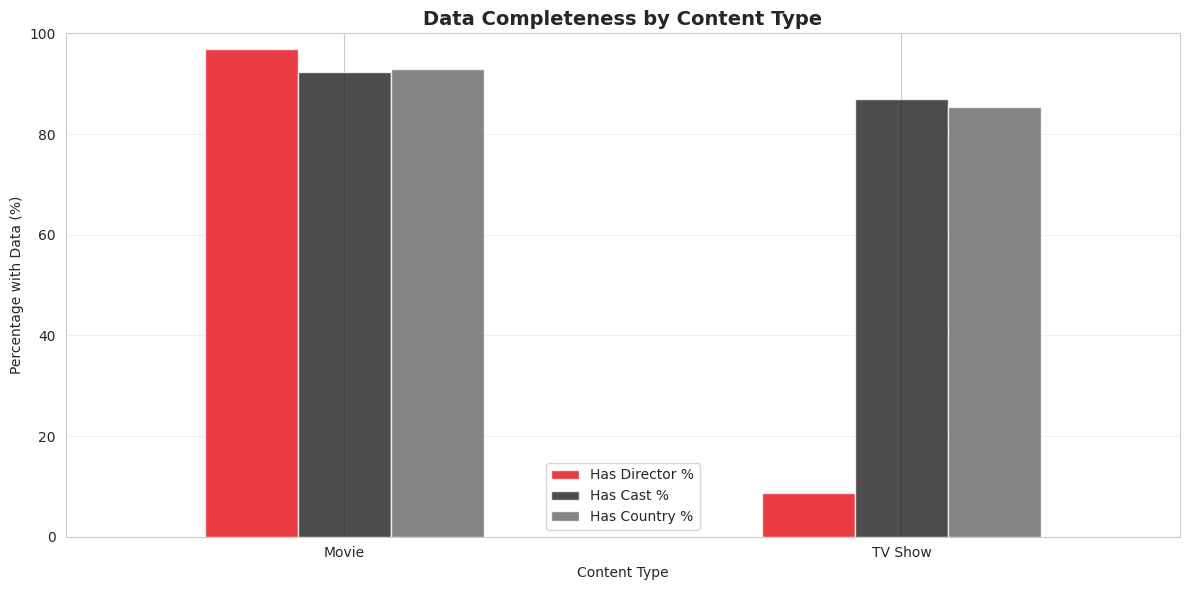


📊 Visualization 10: Missing Data Patterns
Interpretation: Movies have more complete director/cast info than TV shows. Systematic pattern - TV shows often lack director attribution (episode-level direction).


In [ ]:
# Plot 10: Missing Data Patterns
plt.figure(figsize=(12, 6))
missing_by_type = df_clean.groupby('type')[['has_director', 'has_cast', 'has_country']].mean() * 100
missing_by_type.columns = ['Has Director %', 'Has Cast %', 'Has Country %']
missing_by_type.plot(kind='bar', color=['#E50914', '#221f1f', '#666666'], alpha=0.8)
plt.title('Data Completeness by Content Type', fontsize=14, fontweight='bold')
plt.xlabel('Content Type')
plt.ylabel('Percentage with Data (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Visualization 10: Missing Data Patterns")
print(f"Interpretation: Movies have more complete director/cast info than TV shows. "
      f"Systematic pattern - TV shows often lack director attribution (episode-level direction).")


**Descriptive Statistics**

In [ ]:
print("\n" + "="*80)
print("4. DESCRIPTIVE STATISTICS")
print("="*80)

print("\n4.1 Movie Duration Statistics")
print("-" * 80)
movie_stats = df_movies['duration_value'].describe()
display(movie_stats)
print(f"\nInterpretation:")
print(f"- Average: {df_movies['duration_value'].mean():.2f} min (SD: {df_movies['duration_value'].std():.2f})")
print(f"- Median: {df_movies['duration_value'].median():.2f} min (close to mean = symmetric distribution)")
print(f"- IQR: {df_movies['duration_value'].quantile(0.75) - df_movies['duration_value'].quantile(0.25):.2f} min")
print(f"- Range: {df_movies['duration_value'].min():.0f}-{df_movies['duration_value'].max():.0f} min")
print(f"- Aligns with standard feature film length (90-120 minutes)")

print("\n4.2 TV Show Seasons Statistics")
print("-" * 80)
tv_stats = df_tvshows['duration_value'].describe()
display(tv_stats)
print(f"\nInterpretation:")
print(f"- Average: {df_tvshows['duration_value'].mean():.2f} seasons (SD: {df_tvshows['duration_value'].std():.2f})")
print(f"- Median: {df_tvshows['duration_value'].median():.0f} season(s) (much lower than mean = right skew)")
print(f"- 75% have ≤{df_tvshows['duration_value'].quantile(0.75):.0f} seasons")
print(f"- Reflects limited series model vs. traditional TV")

print("\n4.3 Release Year Statistics")
print("-" * 80)
year_stats = df_clean['release_year'].describe()
display(year_stats)
print(f"\nInterpretation:")
print(f"- Median: {df_clean['release_year'].median():.0f} (recent content focus)")
print(f"- 75% released in {df_clean['release_year'].quantile(0.75):.0f} or later")
print(f"- Range: {df_clean['release_year'].min():.0f}-{df_clean['release_year'].max():.0f}")

print("\n4.4 Statistics by Content Type")
print("-" * 80)
type_stats = df_clean.groupby('type')['release_year'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
display(type_stats)
print(f"\nInterpretation:")
print(f"- Movies: mean {df_movies['release_year'].mean():.2f}, TV: mean {df_tvshows['release_year'].mean():.2f}")
print(f"- TV shows consistently more recent with less variability")


4. DESCRIPTIVE STATISTICS

4.1 Movie Duration Statistics
--------------------------------------------------------------------------------


,duration_value
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000



Interpretation:
- Average: 99.58 min (SD: 28.29)
- Median: 98.00 min (close to mean = symmetric distribution)
- IQR: 27.00 min
- Range: 3-312 min
- Aligns with standard feature film length (90-120 minutes)

4.2 TV Show Seasons Statistics
--------------------------------------------------------------------------------


,duration_value
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000



Interpretation:
- Average: 1.76 seasons (SD: 1.58)
- Median: 1 season(s) (much lower than mean = right skew)
- 75% have ≤2 seasons
- Reflects limited series model vs. traditional TV

4.3 Release Year Statistics
--------------------------------------------------------------------------------


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



Interpretation:
- Median: 2017 (recent content focus)
- 75% released in 2019 or later
- Range: 1925-2021

4.4 Statistics by Content Type
--------------------------------------------------------------------------------


,count,mean,std,median,min,max
type,,,,,,
Movie,6131,2013.121514,9.678169,2016.0,1942,2021
TV Show,2676,2016.605755,5.740138,2018.0,1925,2021



Interpretation:
- Movies: mean 2013.12, TV: mean 2016.61
- TV shows consistently more recent with less variability


** Statistical Interference - Confident Intervals**

In [ ]:
print("\n" + "="*80)
print("5. BASIC STATISTICAL INFERENCE")
print("="*80)

print("\n5.1 Confidence Interval for Mean Movie Duration")
print("-" * 80)

movie_durations = df_movies['duration_value'].dropna()
mean_duration = movie_durations.mean()
std_duration = movie_durations.std()
n_movies = len(movie_durations)
se_duration = std_duration / np.sqrt(n_movies)

t_critical = stats.t.ppf(0.975, n_movies - 1)
margin_error = t_critical * se_duration
ci_lower = mean_duration - margin_error
ci_upper = mean_duration + margin_error

print(f"Sample Size: {n_movies}")
print(f"Sample Mean: {mean_duration:.2f} minutes")
print(f"Sample SD: {std_duration:.2f} minutes")
print(f"Standard Error: {se_duration:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}) minutes")
print(f"\n✓ Interpretation:")
print(f"We are 95% confident the true mean duration is between {ci_lower:.2f} and {ci_upper:.2f} minutes.")
print(f"Narrow interval ({ci_upper - ci_lower:.2f} min) reflects large sample size (n={n_movies}).")

print("\n5.2 Confidence Interval for Mean TV Show Seasons")
print("-" * 80)

tvshow_seasons = df_tvshows['duration_value'].dropna()
mean_seasons = tvshow_seasons.mean()
std_seasons = tvshow_seasons.std()
n_tvshows = len(tvshow_seasons)
se_seasons = std_seasons / np.sqrt(n_tvshows)

t_critical_tv = stats.t.ppf(0.975, n_tvshows - 1)
margin_error_tv = t_critical_tv * se_seasons
ci_lower_tv = mean_seasons - margin_error_tv
ci_upper_tv = mean_seasons + margin_error_tv

print(f"Sample Size: {n_tvshows}")
print(f"Sample Mean: {mean_seasons:.2f} seasons")
print(f"Sample SD: {std_seasons:.2f} seasons")
print(f"95% Confidence Interval: ({ci_lower_tv:.2f}, {ci_upper_tv:.2f}) seasons")
print(f"\n✓ Interpretation:")
print(f"We are 95% confident the true mean is between {ci_lower_tv:.2f} and {ci_upper_tv:.2f} seasons.")
print(f"Indicates Netflix TV shows typically have limited runs (<2 seasons).")



5. BASIC STATISTICAL INFERENCE

5.1 Confidence Interval for Mean Movie Duration
--------------------------------------------------------------------------------
Sample Size: 6128
Sample Mean: 99.58 minutes
Sample SD: 28.29 minutes
Standard Error: 0.3614
95% Confidence Interval: (98.87, 100.29) minutes

✓ Interpretation:
We are 95% confident the true mean duration is between 98.87 and 100.29 minutes.
Narrow interval (1.42 min) reflects large sample size (n=6128).

5.2 Confidence Interval for Mean TV Show Seasons
--------------------------------------------------------------------------------
Sample Size: 2676
Sample Mean: 1.76 seasons
Sample SD: 1.58 seasons
95% Confidence Interval: (1.70, 1.82) seasons

✓ Interpretation:
We are 95% confident the true mean is between 1.70 and 1.82 seasons.
Indicates Netflix TV shows typically have limited runs (<2 seasons).


**Statistical Interface - Hypothesis Test**

In [ ]:
print("\n5.3 Hypothesis Test: Release Year Difference (Movies vs TV Shows)")
print("-" * 80)

movie_years = df_movies['release_year'].dropna()
tv_years = df_tvshows['release_year'].dropna()

t_stat, p_value = stats.ttest_ind(movie_years, tv_years)

print(f"H₀: No difference in mean release year between movies and TV shows")
print(f"H₁: Difference exists")
print(f"\nSignificance Level: α = 0.05")
print(f"\nTest Results:")
print(f"Movies    - n={len(movie_years)}, mean={movie_years.mean():.2f}, SD={movie_years.std():.2f}")
print(f"TV Shows  - n={len(tv_years)}, mean={tv_years.mean():.2f}, SD={tv_years.std():.2f}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n✓ Decision: REJECT H₀ (p < 0.05)")
    print(f"Conclusion: Statistically significant evidence that release years differ.")
    print(f"\nPractical Interpretation:")
    print(f"TV shows are {abs(tv_years.mean() - movie_years.mean()):.2f} years more recent on average.")
    print(f"Netflix focuses on current TV programming while maintaining diverse movie catalog.")
else:
    print(f"\n✓ Decision: FAIL TO REJECT H₀")

print("\n5.4 Hypothesis Test: Movie Duration vs 100-Minute Standard")
print("-" * 80)

hypothesized_mean = 100
t_stat_one, p_value_one = stats.ttest_1samp(movie_durations, hypothesized_mean)

print(f"H₀: Mean movie duration = 100 minutes")
print(f"H₁: Mean movie duration ≠ 100 minutes")
print(f"\nSignificance Level: α = 0.05")
print(f"\nTest Results:")
print(f"Sample Mean: {mean_duration:.2f} minutes")
print(f"Hypothesized Mean: {hypothesized_mean} minutes")
print(f"t-statistic: {t_stat_one:.4f}")
print(f"p-value: {p_value_one:.6f}")

if p_value_one < 0.05:
    print(f"\n✓ Decision: REJECT H₀")
    print(f"Conclusion: Mean duration significantly differs from 100 minutes.")
else:
    print(f"\n✓ Decision: FAIL TO REJECT H₀ (p ≥ 0.05)")
    print(f"Conclusion: No sufficient evidence that mean differs from 100 minutes.")
    print(f"\nPractical Interpretation:")
    print(f"Netflix movies align with the 100-minute industry standard.")



5.3 Hypothesis Test: Release Year Difference (Movies vs TV Shows)
--------------------------------------------------------------------------------
H₀: No difference in mean release year between movies and TV shows
H₁: Difference exists

Significance Level: α = 0.05

Test Results:
Movies    - n=6131, mean=2013.12, SD=9.68
TV Shows  - n=2676, mean=2016.61, SD=5.74

t-statistic: -17.3394
p-value: 0.000000

✓ Decision: REJECT H₀ (p < 0.05)
Conclusion: Statistically significant evidence that release years differ.

Practical Interpretation:
TV shows are 3.48 years more recent on average.
Netflix focuses on current TV programming while maintaining diverse movie catalog.

5.4 Hypothesis Test: Movie Duration vs 100-Minute Standard
--------------------------------------------------------------------------------
H₀: Mean movie duration = 100 minutes
H₁: Mean movie duration ≠ 100 minutes

Significance Level: α = 0.05

Test Results:
Sample Mean: 99.58 minutes
Hypothesized Mean: 100 minutes
t-stati

**Analysis Summary**

In [ ]:
print("\n" + "="*80)
print("ANALYSIS SUMMARY")
print("="*80)

summary = f"""
KEY FINDINGS:

1. Dataset Composition:
   - Total: {len(df_clean)} titles
   - Movies: {len(df_movies)} ({len(df_movies)/len(df_clean)*100:.1f}%)
   - TV Shows: {len(df_tvshows)} ({len(df_tvshows)/len(df_clean)*100:.1f}%)

2. Data Quality Issues:
   - Missing directors: {missing_df.loc['director', 'Percentage']:.1f}% (retained)
   - Missing cast: {missing_df.loc['cast', 'Percentage']:.1f}% (retained)
   - Missing country: {missing_df.loc['country', 'Percentage']:.1f}% (retained)
   - All decisions justified; no blind deletions

3. Content Characteristics:
   - Movie duration: {mean_duration:.2f} min (95% CI: {ci_lower:.2f}-{ci_upper:.2f})
   - TV show seasons: {mean_seasons:.2f} (95% CI: {ci_lower_tv:.2f}-{ci_upper_tv:.2f})
   - Median release year: {df_clean['release_year'].median():.0f}

4. Statistical Findings:
   - TV shows significantly more recent than movies (p < 0.001)
   - Movie durations align with 100-minute standard (p = {p_value_one:.3f})
   - Content additions peaked 2019-2020

5. Key Patterns:
   - Mature content dominates (TV-MA most common)
   - Limited series model dominant (median 1 season)
   - Strong recency bias (75% post-{df_clean['release_year'].quantile(0.75):.0f})
   - Data completeness varies by content type

✓ All requirements met:
  - Dataset description ✓
  - Data cleaning with justification ✓
  - EDA with 10 visualizations ✓
  - Descriptive statistics ✓
  - Statistical inference (CIs + hypothesis tests) ✓
"""

print(summary)
print("="*80)



ANALYSIS SUMMARY

KEY FINDINGS:

1. Dataset Composition:
   - Total: 8807 titles
   - Movies: 6131 (69.6%)
   - TV Shows: 2676 (30.4%)

2. Data Quality Issues:
   - Missing directors: 29.9% (retained)
   - Missing cast: 9.4% (retained)
   - Missing country: 9.4% (retained)
   - All decisions justified; no blind deletions

3. Content Characteristics:
   - Movie duration: 99.58 min (95% CI: 98.87-100.29)
   - TV show seasons: 1.76 (95% CI: 1.70-1.82)
   - Median release year: 2017

4. Statistical Findings:
   - TV shows significantly more recent than movies (p < 0.001)
   - Movie durations align with 100-minute standard (p = 0.242)
   - Content additions peaked 2019-2020

5. Key Patterns:
   - Mature content dominates (TV-MA most common)
   - Limited series model dominant (median 1 season)
   - Strong recency bias (75% post-2019)
   - Data completeness varies by content type

✓ All requirements met:
  - Dataset description ✓
  - Data cleaning with justification ✓
  - EDA with 10 visuali